In [2]:
# set the path
path = r"doc/summer paper/"
fig_path = path + "Figures/"
table_path = path + "Tables/"
from functions import *

$$ z_k = \frac{G}{B} = \left(\frac{\alpha}{1-\alpha}\frac{r^B}{r^G}\right)^{\gamma_s}$$
$$ z_l = \frac{L}{K} =  \frac{1-\beta}{\beta} \frac{1}{\alpha}(\alpha_s + (1-\alpha_s) z_k^{-\frac{\gamma_s-1}{\gamma_s}})^{\frac{1}{\gamma_s-1}} \frac{r^G}{W} $$


$$
\frac{\tilde{A}}{r^B + \tau_E\tilde{A}}\left[
            -\frac{\gamma\alpha}{\circ} 
            - (\dfrac{w}{\frac{r}{z_l} + w})\frac{1-\alpha}{\triangle}
            \right]
$$

In [3]:

def gen_df(params,τ_E):
    params_0 = params.copy()
    params_0['τ_E'] = τ_E 
    params_1 = params_0.copy()
    res_1 = ratios_gen(params_1)
    res_1 = res_1.__add__((res_1[6] *params_1['A_tilde'], ))
    params_2 = params_0.copy()
    params_2['A_hat'] = params_2['A_hat'] * 0.8
    params_2['A_tilde'] = params_2['A_tilde'] * 1.2
    res_2 = ratios_gen(params_2)
    res_2 = res_2.__add__((res_2[6] *params_2['A_tilde'], ))
    # put the results into a dataframe
    df = pd.DataFrame([res_1,res_2],columns=['z_k','z_l','l','y','p','g','b','e'])
    df['income'] = (df.y * df.p).round(2)
    df['intensity'] = df.e / df.y / df.p * 1e3
    
    # add sum row
    df.loc['sum'] = np.nan
    df.loc['sum','l']= df.l.sum()
    df.loc['sum','g']= df.g.sum()
    df.loc['sum','b']= df.b.sum()
    df.loc['sum','e']= df.e.sum()
    df.loc['sum','income']= df.income.sum()
    p_s = 0
    y_s = 0
    for i in [res_1,res_2]:
        p_s += i[4] ** (1-params_0['σ'])
        y_s += i[3] ** ((params_0['σ']-1)/(params_0['σ']))
    p_s = p_s ** (1/(1-params_0['σ']))
    y_s = y_s ** (params_0['σ']/(params_0['σ']-1))
    df.loc['sum','p'] = p_s
    # df.p = df.p/p_s
    df.loc['sum','y'] = y_s
    return df

In [4]:
parameters = {
    'β': 0.6,
    'γ':2.58,
    'α': 0.25,
    'A_hat':2,
    'A_tilde': 0.002,
    'μ': 0,
    'θ': 1,
    'η': np.inf,
    'σ': 5,
    'r_b': 0.05,
    'green_premium': 0,
    'w': .500, # MSEK
    'τ_E': 0,# per ton
    'n': int(1e3),
    'sd_hat': .45,
    'sd_tilde': .45,
    'rho': .9,
    }

# CO2 Emission is 13800 Kton
# Labor 500 TSEK

tax_1 = 0
tax_2 = 100/1
tax_3 = 1300/1
df = pd.concat([gen_df(parameters,tax_1),gen_df(parameters,tax_2),gen_df(parameters,tax_3)],keys=['τ_E = {}'.format(tax_1),'τ_E = {}'.format(tax_2),'τ_E = {}'.format(tax_3)],axis=0)
print(1- df.loc[df.index == ('τ_E = {}'.format(tax_3), 'sum')].e.iloc[0]/ df.loc[df.index == ('τ_E = 0', 'sum')].e.iloc[0] , 1- df.loc[df.index == ('τ_E = {}'.format(tax_3), 'sum')].y.iloc[0]/ df.loc[df.index == ('τ_E = 0', 'sum')].y.iloc[0] )
df

0.11289226823792342 0.0867999633748785


z_k       z_l          l             y         p  \
τ_E = 0      0    0.058753  0.102856  40.333701  20608.007837  0.199585   
             1    0.058753  0.102856  16.520684   6752.832008  0.249481   
             sum       NaN       NaN  56.854384  31652.343829  0.183170   
τ_E = 100.0  0    0.059361  0.103245  39.970423  20468.641446  0.200037   
             1    0.059483  0.103322  16.342364   6698.091685  0.250159   
             sum       NaN       NaN  56.312787  31425.929117  0.183609   
τ_E = 1300.0 0    0.066962  0.107889  35.964660  18910.017527  0.205388   
             1    0.068683  0.108891  14.407892   6094.179848  0.258164   
             sum       NaN       NaN  50.372552  28904.921543  0.188798   

                         g          b         e   income  intensity  
τ_E = 0      0    2.191129  37.294151  0.074588  4113.05   0.018135  
             1    0.897486  15.275684  0.036662  1684.71   0.021761  
             sum  3.088615  52.569835  0.111250  5797.76        NaN  
τ_E = 100.0  0    2.194270  36.964930  0.073930  4094.49   0.018056  
             1    0.899030  15.114072  0.036274  1675.59   0.021648  
             sum  3.093300  52.079002  0.110204  5770.08        NaN  
τ_E = 1300.0 0    2.231267  33.321448  0.066643  3883.90   0.017159  
             1    0.917143  13.353246  0.032048  1573.29   0.020370  
             sum  3.148411  46.674694  0.098691  5457.19        NaN

--------------------------------------------------
Intensity: (KG/SEK) (mean,std) 0.00017868214725412154    ,    6.249417664072503e-05
Emission: (MTon)  267.0417737843982
Production: (MSEK) 56287716.3302807
Emission/Production: (KG/SEK)  4.744228247198219e-06
Emission cost:  267.0417737843982
Green Capital:  26554.687672301192
Brown Capital:  1057.2336786831772
Labor: (mean,std)  4.81    ,    17.16
Income (MSEK):  3432578.8361117016
correlatation between intensity and income:  -0.36
Cost share:  0.17868214725412135


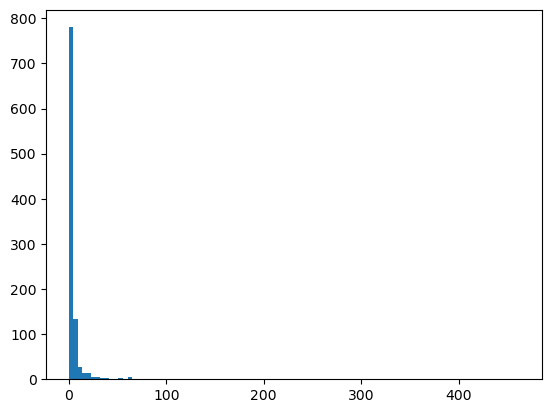

In [22]:
parameters = {
    'β': 0.6,
    'γ':2.58,
    'α': 0.25,
    'A_hat':2,
    'A_tilde': .2,
    'μ': 0,
    'θ': 1,
    'η': np.inf,
    'σ': 5,
    'r_b': 0.05,
    'green_premium': 0,
    'w': .500, # MSEK
    'τ_E': 1000,# per ton
    'n': int(1e3),
    'sd_hat': .45,
    'sd_tilde': 1,
    'rho': .9,
    }
z_k,z_l,l,Y,p,g, b = ratios_gen(parameters)
# print("z_k: ",z_k,"\nz_l: ",z_l,"\nprice: ",p,"\nlabor: ",l,"\noutput: ",Y,"\nbrown capital ",b,"\ngreen capital",g)
# print("intensity: (KG/SEK) ",parameters['A_tilde']*b / p / Y)
# print("intensity: ",function_intensity(parameters['A_tilde'],parameters['A_hat'],parameters['α'],parameters['γ'],z_l,z_k,parameters['β']))
# print("production: (MSEK)",production_function(parameters['A_hat'],parameters['β'],z_l,l))
# print("emission: (ton)",function_intensity(parameters['A_tilde'],parameters['A_hat'],parameters['α'],parameters['γ'],z_l,z_k,parameters['β']) * production_function(parameters['A_hat'],parameters['β'],z_l,l))

##
print("-"*50)
##

res = simulate_firms(parameters)

emissions,production,intensity,emission_cost,G_c,B_c,l,income,cost_share,price = res[0],res[1],res[2],res[3],res[4],res[5],res[6],res[7],res[8],res[9]
Y = CES_aggregator(production,parameters['σ'])
e = sum(emissions)

print("Intensity: (KG/SEK) (mean,std)",intensity.mean(),"   ,   ", intensity.std())
print("Emission: (MTon) ",e)
print("Production: (MSEK)",Y)
print("Emission/Production: (KG/SEK) ",e/Y)
print("Emission cost: ",sum(emission_cost))
print("Green Capital: ",sum(G_c))
print("Brown Capital: ",sum(B_c))
print("Labor: (mean,std) ",l.mean().round(2),"   ,   ",l.std().round(2))
print("Income (MSEK): ",sum(income))
print("correlatation between intensity and income: ",np.corrcoef(intensity,income)[0,1].round(2))
print("Cost share: ",sum(cost_share)/len(cost_share))
#hist plot
plt.figure()
plt.hist(l,bins=100)
plt.show()

In [16]:
par = parameters.copy()
α = par['α']
β = par['β']
γ = par['γ']
σ = par['σ']
τ_E = par['τ_E']
green_premium = par['green_premium']
r_b = par['r_b']
w = par['w']
A_tilde = par['A_tilde']
A_hat = par['A_hat']
n = par['n']
sd_hat = 1/2
sd_tilde = 2/2
rho = .5
cov = rho * sd_hat * sd_tilde

# simulate over multiple firms
r_g = (1-green_premium) * r_b
np.random.seed(0)
# A_tilde_vector = (1 + np.random.lognormal(mean=0,sigma=sd,size=n)) * A_tilde
# A_hat_vector = (1 + np.random.lognormal(mean=0,sigma=sd,size=n)) * A_hat

A_tilde_mu = np.log(A_tilde)
A_hat_mu = np.log(A_hat)
#build two correlated vectors
mu = np.array([A_tilde_mu,A_hat_mu])

# The desired covariance matrix.
r = np.array([
        [sd_tilde ** 2, cov],
        [cov, sd_hat ** 2]
    ])
rng = np.random.default_rng(seed=0)
A_vector = rng.multivariate_normal(mu, r, size=n)
A_vector = np.exp(A_vector)
np.corrcoef(A_vector[:,0],A_vector[:,1]),np.cov(A_vector[:,0],A_vector[:,1]),np.mean(A_vector,axis=0)


(array([[1.        , 0.44923507],
        [0.44923507, 1.        ]]),
 array([[2.87507126e-05, 2.93882548e-03],
        [2.93882548e-03, 1.48850972e+00]]),
 array([0.00354816, 2.26778195]))

Text(0.5, 1.0, 'A_tilde distribution')

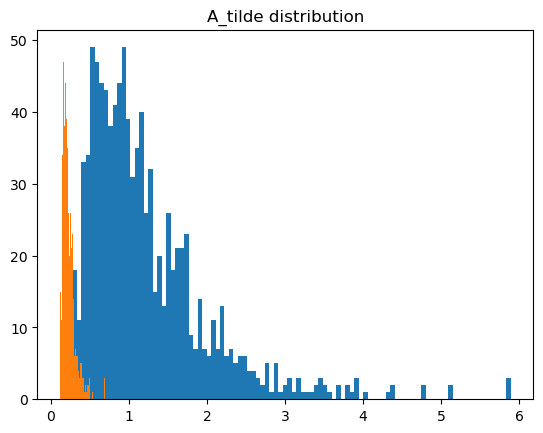

In [18]:
test = np.random.lognormal(mean=0,sigma=.6,size=1000)
A_tilde_vector = (1 + test) * 0.1
#hist plot
plt.figure()
plt.hist(test,bins=100)
plt.hist(A_tilde_vector,bins=100)
plt.title("A_tilde distribution")


In [ ]:
τ_E = 100
z_k,z_l = optimal_ratios(parameters,τ_E)
res1 = function_price(parameters['A_tilde'],parameters['A_hat'],parameters['α'],parameters['γ'],z_l,z_k,parameters['β'],parameters['w'],parameters['green_premium'],parameters['r_b'],parameters['σ'],τ_E,detail=True)
res1 = res1 + (z_k,z_l)
z_k,z_l = optimal_ratios(parameters,0)
res2 = function_price(parameters['A_tilde'],parameters['A_hat'],parameters['α'],parameters['γ'],z_l,z_k,parameters['β'],parameters['w'],parameters['green_premium'],parameters['r_b'],parameters['σ'],0,detail=True)
res2 = res2 + (z_k,z_l)
df = pd.DataFrame([res2,res1],columns=['C_G','C_B','c_L','C_E','P','z_k','z_l'],index=['τ_E = 0','τ_E = {}'.format(τ_E)])

df


,C_G,C_B,c_L,C_E,P,z_k,z_l
τ_E = 0,0.019583,0.176247,0.130553,0.00000,4.079785,0.111111,0.106667
τ_E = 100,0.020604,0.172775,0.133066,0.00622,4.158309,0.119255,0.110110


z_k:  0.1111111111111111 
z_l:  0.10666666666666669 
price:  4.079784843170737 
labor:  2.310100814724803
intensity: (KG/SEK)  0.6344881388099127
production: (MSEK) 0.060318171456707995
emission: (ton) 3.827116434398386e-08
--------------------------------------------------
Intensity: (KG/SEK) 0.8102412939506161
Emission: (MTon)  0.07531376745152116
Production: (BSek)  1.7699635085094836
Emission/Production: (KG/SEK)  0.042551028362694414
Emission cost:  0.0
Green Capital:  222520.26924543033
Brown Capital:  33219672.251065873


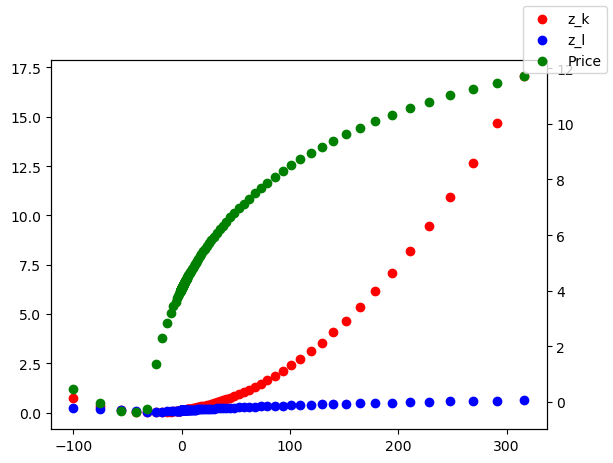

In [4]:
def price_test(input_0,τ_E):
    z_k = function_z_k(input_0['α'],input_0['γ'],input_0['r_b'], input_0['green_premium'],τ_E,input_0['A_tilde'])
    z_l = function_z_l(z_k,input_0['β'],input_0['α'],input_0['γ'],input_0['w'],input_0['green_premium'],input_0['r_b'])
    p = function_price(input_0['A_tilde'],input_0['A_hat'],input_0['α'],input_0['γ'],z_l,z_k,input_0['β'],input_0['w'],input_0['green_premium'],input_0['r_b'],input_0['σ'],τ_E)
    return p,z_k,z_l
# print()
params_0 = parameters.copy()
params_0['σ'] = 5
# params_0['γ'] = 1100
x_test = []
y_test = []
k_test = []
l_test = []
import matplotlib.pyplot as plt

for i in np.append(np.logspace(-1,2.5,100), -np.logspace(-1,2,25)):
    p,z_k,z_l = price_test(params_0,i*1e2)
    if ~np.isnan(p):
        x_test.append(i)
        y_test.append(p)
        k_test.append(z_k)
        l_test.append(z_l)
# 
fig, ax1 = plt.subplots()


ax1.scatter( x_test,k_test,color='r',label=False)
ax1.scatter( x_test,l_test,color='b',label=False)
ax2 = ax1.twinx()
ax2.scatter( x_test,y_test,color='g',label=False)
fig.legend(['z_k','z_l','Price'])
plt.show()


In [6]:
def function_coef(A_tilde,α,γ,z_l,z_k,green_premium,r_b,τ_E,w,β):
    epsilon_change = A_tilde/(r_b + τ_E/1000 * A_tilde) * (
    -γ*α/(function_green_ratio(α,γ,z_k) ** (-((γ-1)/γ))) - (1-α)/(function_green_ratio(α,γ,z_k) ** (-((γ-1)/γ)))/(function_r(α,γ,z_k,green_premium,r_b) /w/z_l) 
    )
    c_change = 1/(τ_E/1000) + epsilon_change
    return epsilon_change/c_change 
parameters_0 = parameters.copy()
parameters_0['τ_E'] = 1000
parameters_0['γ'] = 2
z_k,z_l = optimal_ratios(parameters_0,parameters_0['τ_E'])
function_coef(parameters_0['A_tilde'],parameters_0['α'],parameters_0['γ'],z_l,z_k,parameters_0['green_premium'],parameters_0['r_b'],parameters_0['τ_E'],parameters_0['w'],parameters_0['β'])

-0.19012233408528623

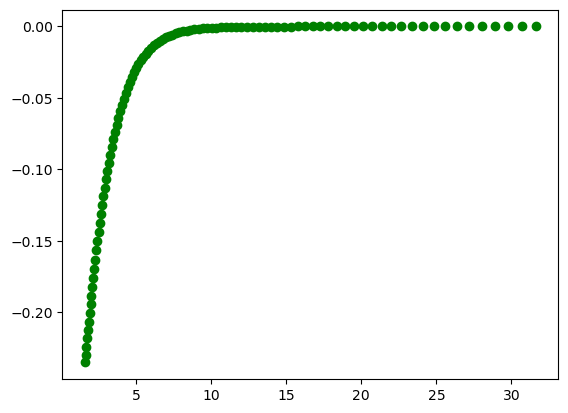

In [7]:
τ_E = 1000
params_0 = parameters.copy()
params_0['τ_E'] = τ_E
x_test = []
y_test = []
k_test = []
l_test = []
import matplotlib.pyplot as plt

for i in np.logspace(0.2,1.5,100):
    params_0['γ'] = i
    z_k,z_l = optimal_ratios(params_0,τ_E)
    coef = function_coef(params_0['A_tilde'],params_0['α'],params_0['γ'],z_l,z_k,params_0['green_premium'],params_0['r_b'],params_0['τ_E'],params_0['w'],params_0['β'])
    if ~np.isnan(coef):
        x_test.append(i)
        y_test.append(coef)
# 
fig, ax1 = plt.subplots()

ax1.scatter( x_test,y_test,color='g',label=False)
# fig.legend(['z_k','z_l','Price'])
plt.show()

In [167]:
def test_func(params_0):
    z_k = function_z_k(params_0['α'],params_0['γ'],params_0['r_b'], params_0['green_premium'],params_0['τ_E'],params_0['A_tilde'])
    z_l = function_z_l(z_k,params_0['β'],params_0['α'],params_0['γ'],params_0['w'],params_0['green_premium'],params_0['r_b'])
    l = optimal_labor(params_0['A_tilde'],params_0['A_hat'],params_0['α'],params_0['γ'],z_l,z_k,params_0['β'],params_0['w'],params_0['green_premium'],params_0['r_b'],params_0['σ'],params_0['τ_E'])
    y = production_function(params_0['A_hat'],params_0['β'],z_l,l)
    p = function_price(params_0['A_tilde'],params_0['A_hat'],params_0['α'],params_0['γ'],z_l,z_k,params_0['β'],params_0['w'],params_0['green_premium'],params_0['r_b'],params_0['σ'],params_0['τ_E'])
    C_G,C_B,c_L,C_E = function_price_detail(params_0['A_tilde'],params_0['A_hat'],params_0['α'],params_0['γ'],z_l,z_k,params_0['β'],params_0['w'],params_0['green_premium'],params_0['r_b'],params_0['σ'],params_0['τ_E'])
    return z_k,z_l,l,y*1e3,p,C_G,C_B,c_L,C_E

params_0 = params.copy()
params_0['σ'] = 5
params_0['w'] = params_0['w'] / 1e3
params_0['τ_E'] = 20 * 1e2
z_k,z_l,l,y,p,C_G,C_B,c_L,C_E = test_func(params_0)
print("C_G:", C_G)
print("C_B:", C_B)
print("c_L:", c_L)
print("C_E:", C_E)
print("P: ",params_0['σ']/(params_0['σ']-1) * (C_G + C_B + c_L + C_E) / params_0['A_hat'])





C_G: 0.03250359679419391
C_B: 0.01863539549533783
c_L: 1.1337234725274548
C_E: 0.013417484756643235
P:  14.978499369670372
